Quyidagi jpynb oraqali bajarilgan vazifalarni ko'rishingiz mumkin:

1.Vazifadagi asosiy metodlar **fillna,drop_duplicates,groupby,map,replace** 
2.  *Hammaga omad* 
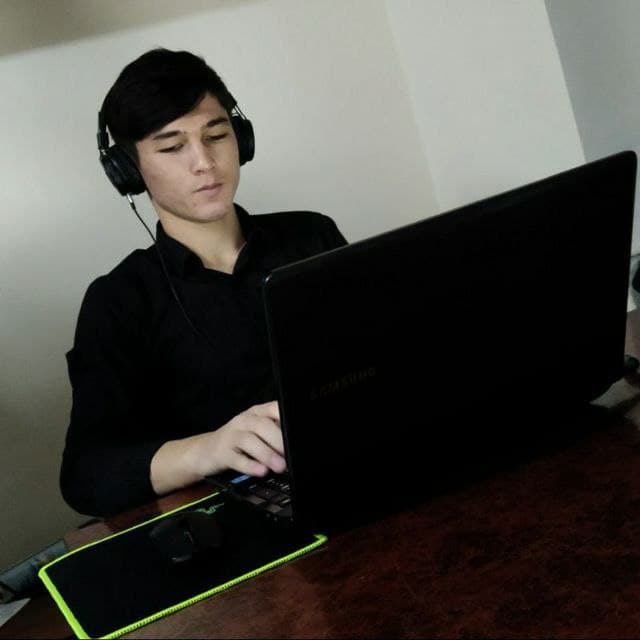


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/healt_info.csv")
df.head(3)

,Sno,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,03-08-2013 20:38,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,06-08-2013 07:26,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,09-08-2013 18:30,12500,22-03-2017 20:25,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D


Bu dataset sug'urta kompaniyasining real ma'lumotlardan tuzilgan. Bu datasetda 480000 qator sug'urta ma'lumotlar tashkil topgan.
Quyida datasetning ba'zi ustunlari haqida qisqacha ma'lumot

*   Sno = seriya raqami 
*   AGE = yoshi
*   SEX = jinsi (female = ayol, male = erkak)
*   CASTE_NAME = kasta nomi (Hindistonda har bir inson ma'lum bir kastaga oid bo'ladi)
*   CATEGORY_CODE = kategoriya kodi
*   CATEGORY_Name = kategoriya nomi
*   SURGERY_CODE = operatsiya kodi
*   Mandal_Name = mandal nomlanishi ya'ni familiyasi desak ham bo'ladi
*   Mortality Y/N = vafot etgan yoki vafot etmaganligi
*   MORTALITY_DATE = qachon vafot etganligi





### **1-mashq**. Datasetdagi barcha takrorlangan qatorlar sonini toping

In [ ]:
# Javobni shuyerga yozing

df.duplicated().sum()


0

In [ ]:
#@title **To'g'ri javob**
sum(df.duplicated())

0

#### **2-mashq**. Datasetdagi quyidagi ustunlar o'chirib yuborilsin:<br>
*   Sno
*   CATEGORY_CODE
*   SURGERY_CODE
*   MANDAL_NAME
*   DISTRICT_NAME
*   HOSP_DISTRICT
<BR>


In [ ]:
# Javobni shuyerga yozin
df.drop(["SURGERY_CODE","MANDAL_NAME","DISTRICT_NAME","HOSP_DISTRICT"],axis=1,inplace=True)

In [ ]:
#@title **To'g'ri javob**
df.drop(['Sno','CATEGORY_CODE','SURGERY_CODE','MANDAL_NAME','DISTRICT_NAME','HOSP_DISTRICT'],axis='columns',inplace=True)
df

#### **3-mashq**. Datasetdagi sex(jinsi) nomli qatordagi qiymatlarni unique funksiyasi orqali tekshiring.




In [ ]:
# Javobni shuyerga yozing
df["SEX"].unique()

array(['Female', 'Male', 'Male(Child)', 'Female(Child)', 'FEMALE'],
      dtype=object)

In [ ]:
#@title **To'g'ri javob**
df["SEX"].unique()


#### **4-mashq**. Datasetdagi sex(jinsi) nomli qatordagi qiymatlarni **Erkak** va **Ayol** ga o'zgartiring:
O'zgartirish quyidagicha bo'lsin:


*   Male -> Erkak
*   Male(child) -> Erkak
*   Female - > Ayol
*   Female(child) - Ayol
*   MALE -> Erkak
*   FEMALE -> Ayol





In [ ]:
# Javobni shuyerga yozing

dict={"Male":"Erkak","Male(Child":"Erkak","Female":"Ayol","Female(Child)":"Ayol","MALE":"Erkak","FEMALE":"Ayol"}

In [ ]:
df["SEX"]=df["SEX"].map(dict)

In [ ]:
#@title **To'g'ri javob**
dict = {"Male":"Erkak","Male(child)":"Erkak", "Female":"Ayol","Female(child)":"Ayol","MALE":"Erkak","FEMALE":"Ayol"}
df["SEX"] = df["SEX"].map(dict)

#### **5-mashq**. Endi xuddi shu SEX columndagi ma'lumotlarni raqamlarga o'zgartiring: Erkaklarni 1 raqamiga, Ayollarni 0 raqamiga o'zgartiring.
*   Erkak -> 1
*   Ayol -> 0

In [ ]:
# Javobni shuyerga yozing
df["SEX"]=df["SEX"].replace(["Erkak","Ayol"],[1,0])
df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_NAME,SURGERY,VILLAGE,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,0.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Lolugu,03-08-2013 20:38,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D
1,37,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Borivanka,06-08-2013 07:26,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D
2,50,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Kapasakuddi,09-08-2013 18:30,12500,22-03-2017 20:25,11500,"Rims Govt. General Hospital, Srikakulam",G,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D
3,45,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Telikipenta,24-08-2013 19:37,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D
4,54,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Thandemvalasa,28-08-2013 17:03,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,31-08-2013 00:00,02-10-2013 00:00,NO,NaN,D


In [ ]:
#@title **To'g'ri javob**
dict2 = {'Erkak':1, 'Ayol':0}
df["SEX"] = df["SEX"].map(dict2)
df.head(5)

#### **6-mashq**. Shu jarayonni HOSP_TYPE ustuni uchun ham amalga oshiring. 
*   G - General hospital (umumiy kasalxona) degani
*   C - Special hospital (maxsus kasalxona) degani
<br><b>O'zgarish quyidagicha bo'lsin:</b>
*   G -> Umumiy 
*   C -> Maxsus


In [ ]:
# Javobni shuyerga yozing

df["HOSP_TYPE"]=df["HOSP_TYPE"].replace(["G","C"],["Umumiy","Maxsus"])
df.head()


,AGE,SEX,CASTE_NAME,CATEGORY_NAME,SURGERY,VILLAGE,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,0.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Lolugu,03-08-2013 20:38,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",Umumiy,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D
1,37,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Borivanka,06-08-2013 07:26,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",Umumiy,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D
2,50,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Kapasakuddi,09-08-2013 18:30,12500,22-03-2017 20:25,11500,"Rims Govt. General Hospital, Srikakulam",Umumiy,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D
3,45,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Telikipenta,24-08-2013 19:37,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",Umumiy,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D
4,54,1.0,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,Thandemvalasa,28-08-2013 17:03,12500,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",Umumiy,31-08-2013 00:00,02-10-2013 00:00,NO,NaN,D


In [ ]:
#@title **To'g'ri javob**
df["HOSP_TYPE"] = df["HOSP_TYPE"].map({'G':"Umumiy", 'C':"Maxsus"})


#### **7-mashq**. O'zgartirish amalga oshirilgach, HOSP_TYPE ustunida qancha Umumiy va qancha Maxsus kasalxonalar borligini ham aniqlang


In [ ]:
# Javobni shuyerga yozing

df["HOSP_TYPE"].value_counts()

Maxsus    241139
Umumiy     94255
Name: HOSP_TYPE, dtype: int64

In [ ]:
#@title **To'g'ri javob**
df["HOSP_TYPE"].value_counts()

#### **8-mashq**. Datasetda qancha takrorlangan qatorlar borligini aniqlang  


In [ ]:
# Javobni shuyerga yozing
df.duplicated().sum()


30

In [ ]:
#@title **To'g'ri javob**
sum(df.duplicated())

30

#### **9-mashq**. Datasetda barcha takrorlangan qatorlarni o'chirib yuboring  


In [ ]:
# Javobni shuyerga yozing

df.drop_duplicates(inplace=True)

In [ ]:
#@title **To'g'ri javob**
df.drop_duplicates(inplace=True)

#### **10-mashq**. Datasetdan shifoxona turiga ko'ra (umumiy va maxsus), ClAIM_AMOUNTning o'rtacha qiymatlarini toping.


In [ ]:
# Javobni shuyerga yozing
df.groupby("HOSP_TYPE").CLAIM_AMOUNT.mean()


HOSP_TYPE
Maxsus    30275.151848
Umumiy    22683.770100
Name: CLAIM_AMOUNT, dtype: float64

In [ ]:
#@title **To'g'ri javob**
df.groupby('HOSP_TYPE').CLAIM_AMOUNT.mean()


#### **11-mashq**. Datasetdan shifoxona turiga ko'ra (umumiy va maxsus), ClAIM_AMOUNTning minimum qiymatlarini toping.


In [ ]:
# Javobni shuyerga yozing
df.groupby("HOSP_TYPE").CLAIM_AMOUNT.min()

HOSP_TYPE
Maxsus    2
Umumiy    2
Name: CLAIM_AMOUNT, dtype: int64

In [ ]:
#@title **To'g'ri javob**
df.groupby('HOSP_TYPE').CLAIM_AMOUNT.min()

#### **12-mashq**. Datasetdan shifoxona turiga ko'ra (umumiy va maxsus), CLAIM_AMOUNTning maksimum qiymatlarini toping.


In [ ]:
# Javobni shuyerga yozing

df.groupby("HOSP_TYPE").CLAIM_AMOUNT.max()

HOSP_TYPE
Maxsus    520000
Umumiy    520000
Name: CLAIM_AMOUNT, dtype: int64

In [ ]:
#@title **To'g'ri javob**
df.groupby('HOSP_TYPE').CLAIM_AMOUNT.max()

.agg() yordamida istalgan funksiyalarni chaqirishimiz mumkin, misol uchun numpy dagi mean (o'rta qiymat) funiksiyasini ham qo'shamiz. Natijalarni faqat price ustuni uchun chiqaramiz:

#### **13-mashq**. Datasetdan jinsiga ko'ra CLAIM_AMOUNTning min, max va o'rta qiymatlarni agg() usuli yordamida toping.



In [ ]:
# Javobni shuyerga yozing

df.groupby("SEX").CLAIM_AMOUNT.agg([min,max,np.mean])

,min,max,mean
SEX,,,
0.0,2,520000,25960.356579
1.0,2,205000,29636.456810


In [ ]:
#@title **To'g'ri javob**
df.groupby('SEX').CLAIM_AMOUNT.agg([min, max, np.mean])
